## Sentiment Analysis on Movie Reviews using LSTM 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords   
from sklearn.model_selection import train_test_split       
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,Flatten,MaxPooling1D,GRU,Bidirectional
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [2]:
# data set link: https://www.kaggle.com/c/movie-review-sentiment-analysis-kernels-only/data

## Read data
train = pd.read_csv('D:/Dataset/MovieReview/train.tsv.zip',sep="\t") 
test = pd.read_csv('D:/Dataset/MovieReview/test.tsv.zip',sep="\t") 
print("Train shape: ",train.shape)
print("Test shape: ",test.shape)

Train shape:  (156060, 4)
Test shape:  (66292, 3)


In [3]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
train['Phrase'][0] # print first review

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

In [5]:
len(train['Phrase'][2]) 

8

In [6]:
len(train['Phrase'][0]) # length of first review

188

In [7]:
print("Max Len:  ",train['Phrase'].str.len().max()) # maximum length of movie rewiew
print("Min Len:  ",train['Phrase'].str.len().min())
print("Mean Len:  ",train['Phrase'].str.len().mean())

Max Len:   283
Min Len:   1
Mean Len:   40.217224144559786


In [8]:
# Count the sentiment score on each class
train['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

<AxesSubplot:title={'center':'Number of sentiment class'}, xlabel='Sentiment', ylabel='count'>

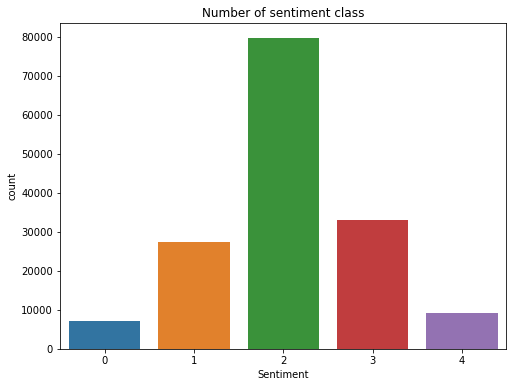

In [9]:
## Plot the number of sentiment distributed
plt.figure(figsize=(8,6))
ax=plt.axes()
ax.set_title('Number of sentiment class')
sns.countplot(x=train['Sentiment'],data=train)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [11]:
# print all NaN values for all columns of train
train.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
Sentiment     0
dtype: int64

In [12]:
# print all NaN values for all columns of train
test.isnull().sum()

PhraseId      0
SentenceId    0
Phrase        0
dtype: int64

In [26]:
train = train.sample(frac=1).reset_index(drop=True)
train['Phrase'] = train['Phrase'].apply(lambda x: x.lower())
test['Phrase'] = test['Phrase'].apply(lambda x: x.lower())

## tf.keras.preprocessing.text.Tokenizer

In [14]:
'''tf.keras.preprocessing.text.Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' ', char_level=False, oov_token=None,
    document_count=0, **kwargs
)'''

'tf.keras.preprocessing.text.Tokenizer(\n    num_words=None,\n    filters=\'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\',\n    lower=True, split=\' \', char_level=False, oov_token=None,\n    document_count=0, **kwargs\n)'

In [27]:
maxlen = 300
max_features = 500

X = train['Phrase']
test_X = test['Phrase']
Y = to_categorical(train['Sentiment'].values)

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X))

X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=maxlen)
test_X = tokenizer.texts_to_sequences(test_X)
test_X = pad_sequences(test_X, maxlen=maxlen)

In [16]:
X.max()

499

In [17]:
X

array([[  0,   0,   0, ..., 172,  24, 177],
       [  0,   0,   0, ..., 176, 303,   4],
       [  0,   0,   0, ..., 277,  18,  88],
       ...,
       [  0,   0,   0, ...,   0,   0,  40],
       [  0,   0,   0, ...,   0,   0, 196],
       [  0,   0,   0, ...,   0,   0,   0]])

In [18]:
X.shape

(156060, 300)

In [19]:
Y

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [20]:
# Split Dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state=100)
print("X train Shape: ",x_train.shape)
print("X test Shape: ",x_test.shape)
print("Y train Shape: ",y_train.shape)
print("Y test Shape: ",y_test.shape)

X train Shape:  (117045, 300)
X test Shape:  (39015, 300)
Y train Shape:  (117045, 5)
Y test Shape:  (39015, 5)


In [21]:
'''tf.keras.layers.Embedding(
    input_dim,   
    output_dim,
    embeddings_initializer="uniform",
    embeddings_regularizer=None,
    activity_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    input_length=None,
    **kwargs
)'''

# input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
#output_dim: Integer. Dimension of the dense embedding.
# mask_zero: Boolean, whether or not the input value 0 is a special "padding" value that should be masked out.
            # This is useful when using recurrent layers which may take variable length input.
# Embedding(1000, 64, input_length=10):
                # the input should be no larger than 999 (vocabulary size).
                # Now model.output_shape is (None, 10, 64), where `None` is the batch dimension.

'tf.keras.layers.Embedding(\n    input_dim,   \n    output_dim,\n    embeddings_initializer="uniform",\n    embeddings_regularizer=None,\n    activity_regularizer=None,\n    embeddings_constraint=None,\n    mask_zero=False,\n    input_length=None,\n    **kwargs\n)'

In [22]:
#!pip install -U numpy==1.18.5

In [23]:
model = Sequential()
model.add(Embedding(max_features,100,mask_zero=True))
model.add(LSTM(128,dropout=0.5, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(32,dropout=0.5, recurrent_dropout=0.4,return_sequences=True))
model.add(LSTM(16,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         50000     
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 5)                 85        
Total params: 232,293
Trainable params: 232,293
Non-trainable params: 0
__________________________________________________

In [28]:
epochs = 1
batch_size = 64
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=epochs, batch_size=batch_size, verbose=1)

 488/1829 [=======>......................] - ETA: 1:11:36 - loss: 1.3076 - accuracy: 0.5108

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(x_test),y_test)*100

In [ ]:
df = pd.read_csv('D:/Dataset/MovieReview/sampleSubmission.csv')
df['Predicted'] = model.predict_classes(test_X, batch_size=batch_size, verbose=1)
#df.to_csv('predict_lstm.csv', index=False)